In [13]:
### ALL Imports , make sure you install them

import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
### Please download the package below before running it
from mpl_toolkits.mplot3d import Axes3D

In [15]:
df = pd.read_csv('Train_C.csv')

DATA EXPLORATION (NEED NOT BE RUN BY THE EVALUATOR)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.columns # Age = 66, Region code  = 53 Policy_sales_channel = 155

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


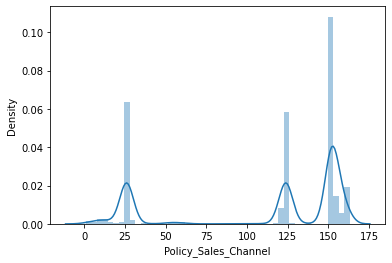

In [12]:
sns.distplot(df['Policy_Sales_Channel']*1)

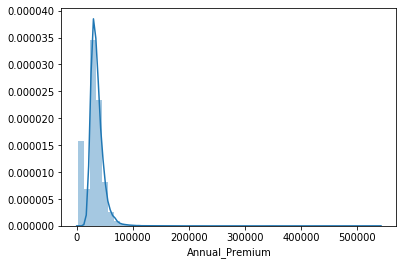

In [ ]:
sns.distplot(df['Annual_Premium'])

PLEASE START RUNNING THE CODES BELOW

In [16]:
################ ASSIGNMENT ###################################
###  1a)
print(df.isna().sum())
print('\n')
print(df.isnull().sum())

### Ans: No Missing ot Null values in the dataset

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [17]:
## This converts the complete dataset into a list of dictionaries
## Each dictionary has all the keys except 'id'
dic = (df.drop(['id'], axis = 1).T.to_dict()).values()
list = []
for example in dic:
    list.append(example)

In [18]:
########### RANDOMLY DIVIDING THE DATA TO TRAIN TEST SET##########

y = df['Response'].values
X_train, X_test, y_train, y_test = train_test_split(list,y, test_size = 0.2, random_state = 101)

In [19]:
##### converting the data into a dataframe, which makes it easier to process
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [20]:
def encode(df_train, df_test):

    """
      This function Label Encodes the features 'Vehicle_Age','Gender', 'Vehicle_Damage'

      params:
          df_train (dataframe):
          df_test (dataframe)
      returns: 
          the encoded dataframes (df_train, df_test)

    """
    
    encoder = LabelEncoder()
    encoder.fit(df_train['Vehicle_Age'])
    df_train['Vehicle_Age'] = encoder.transform(df_train['Vehicle_Age'])
    df_test['Vehicle_Age'] = encoder.transform(df_test['Vehicle_Age'])
    
    encoder = LabelEncoder()
    df_train['Vehicle_Damage'] = encoder.fit_transform(df_train['Vehicle_Damage'])
    df_test['Vehicle_Damage'] = encoder.transform(df_test['Vehicle_Damage'])
    
    encoder = LabelEncoder()
    df_train['Gender'] = encoder.fit_transform(df_train['Gender'])
    df_test['Gender'] = encoder.transform(df_test['Gender'])
    
    return df_train, df_test
    

In [21]:
######### ASSIGNMENT #########################
##### Q 1b)     ### Run the cell below
df_train, df_test = encode(df_train, df_test)

In [22]:
def normalise(df_train, df_test):

    """
      This function like encode() takes in the test and train dataframe
      and it normalises it

    """
    
    scaler = StandardScaler()
    df_train['Age'] = scaler.fit_transform(np.reshape((df_train['Age'].values),(len(df_train), 1)))
    df_test['Age'] = scaler.transform(np.reshape((df_test['Age'].values),(len(df_test), 1)))
    
    scaler = StandardScaler()
    df_train['Annual_Premium'] = scaler.fit_transform(np.reshape((df_train['Annual_Premium'].values),(len(df_train), 1)))
    df_test['Annual_Premium'] = scaler.transform(np.reshape((df_test['Annual_Premium'].values),(len(df_test), 1)))
                                                 
    scaler = MinMaxScaler()
    df_train['Region_Code'] = scaler.fit_transform(np.reshape((df_train['Region_Code'].values),(len(df_train), 1)))
    df_test['Region_Code'] = scaler.transform(np.reshape((df_test['Region_Code'].values),(len(df_test), 1)))    
    
    scaler = StandardScaler()
    df_train['Vintage'] = scaler.fit_transform(np.reshape((df_train['Vintage'].values),(len(df_train), 1)))
    df_test['Vintage'] = scaler.transform(np.reshape((df_test['Vintage'].values),(len(df_test), 1)))
    
    return df_train, df_test

In [23]:
## Run the cell below to normalise it
df_train, df_test = normalise(df_train, df_test)

In [26]:
def Discretising_Policy_Channels(x):

    """
      This function takes a value and returns a corresponding class value based on its value
      Used exclusively for discretising "Policy_Sales_Channel"

    """
      
    if x <=75:
        return 0
    elif x>75 and x<=149:
        return 1
    elif x> 149:
        return 2
    

In [27]:
###### We realises after plotting the distribution of "Policy_Sales_Channel" that
## it doesnt look like a Gaussian, hence we categorized this feature into 3 bins
### Run cells below, this will treat the features as discrete


df_train['Policy_Sales_Channel'] = df_train['Policy_Sales_Channel'].apply(lambda x: Discretising_Policy_Channels(x))
df_test['Policy_Sales_Channel'] = df_test['Policy_Sales_Channel'].apply(lambda x: Discretising_Policy_Channels(x))

In [28]:

features_list = df.drop(['Response','id'], axis = 1).columns ## The list of all features

In [29]:
## Discrete Features are : [0,2,4,5,6,8] total 10 features
features_list

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [30]:

### This is a dictionary were we maintain if a features for our computation is considered
### a Continuous variable or a dicrete variable. 1 - Discrete, 0 - Continuous

feature_type = {}
feature_type['Gender'] = 1
feature_type['Age'] = 0
feature_type['Driving_License'] = 1
feature_type['Region_Code'] = 0
feature_type['Previously_Insured'] = 1
feature_type['Vehicle_Age'] = 1
feature_type['Vehicle_Damage'] = 1
feature_type['Annual_Premium'] = 0
feature_type['Policy_Sales_Channel'] = 1
feature_type['Vintage'] = 0

In [31]:
### Running the cells below will covert the df_train, df_test which are encoded and normalised
### to a list of dictionaries that can be used for training/testing

dic = (df_train).T.to_dict().values()
X_train = []
for example in dic:
    X_train.append(example)


dic = (df_test).T.to_dict().values()
X_test = []
for example in dic:
    X_test.append(example)

In [32]:
def separate_classes(df, feature):

    """
      This function takes a dataframe and a particular feature. It separates the 
      data in dataframe[features] into 2 lists containing values correponding to 
      each target class

      params:
        df:
          data as dataframe
        features:
          the feature based whose value needs to be split

      returns: 
        class0_list (list):
          The feature values corresponding to class 0
        class1_list (list):
          The feature values corresponding to class 0
    """
    
    class1_list = []
    class0_list = []
    all_elements = df[feature].values
    class1_index = (df['Response'] == 1).values
    class0_index = (df['Response'] == 0).values
    
    for i in range(len(class1_index)):
        if(class1_index[i] == 1):
            class1_list.append(all_elements[i])
        elif(class1_index[i] == 0):
            class0_list.append(all_elements[i])
            
    return class0_list, class1_list

In [33]:
def calculate_mean(s):
  
    """
      Calculates mean of a sample distribution that is passes as an array
    """
    
    return sum(s) / float(len(s))

In [34]:
def calculate_stdev(s):

    """
      Calculates mean of a sample distribution that is passes as an array
    """
    
    if(len(s)>1):
        avg = calculate_mean(s) 
        variance = sum([pow(x - avg, 2) for x in s]) / float(len(s) - 1)
        
        return math.sqrt(variance)

In [35]:
def calculate_Gaussian_Probability(x, mean, stdev):

    """
      This function computes the Gaussian Probability given the mean and stdev

      params: 
        x, mean, stdev: All are single valued points
      
      returns:
        Gaussian probability based on the Formula

    """

    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2)))) 
    
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo

In [36]:
def compute_probabilites(train, features_list, feature_type,m):

    """
    This function is the heart of the Naive Bayes Classifier
    It takes as input the training set, the Feature_list and the Feature type computed above
    It also takes in the  m value - which is used as the m estimator to handle zero 
    discrete probability

    params:
      train (list):
        contains training data as a list of dictionaries
      features_list (list):
        contains the features to be used
      feature_type (list):
        contains wheteher to conseider each feature as discrete or continuous

    returns:
       (probabilities_class0, probabilities_class1) (lists):
            These lists contain the probabilities of getting discrete values given the class
       (mean_std_class0, mean_std_class1) (lists):
            These lists contain the mean and stdev of each continuous variable given the class.
            This is used to compute the Gaussian Probability

    """

    ## We need to convert the incoming list of dictionaries to a pandas datframe in order to get the
    ## probabilities computation

    df_train = pd.DataFrame(train.tolist())
    
    probabilities_class1 = {} ## These dictionaries store the discrete probabilities
    probabilities_class0 = {}
    probabilities_class1["class_1"] = df_train['Response'].sum()/len(df_train['Response'])
    probabilities_class0['class_0'] = 1 - probabilities_class1['class_1']

    class1_index = (df_train['Response'] == 1).values
    class0_index = (df_train['Response'] == 0).values

    mean_std_class1 = {} ### These dictionaries store the continous variable mean and stdev
    mean_std_class0 = {}

    for feature in features_list:
        if(feature_type[feature] == 1): ## It is a discrete variable

            for i in range(df_train[feature].nunique()):
                probabilities_class1[feature + '=' + str(i)] = ((class1_index*(df_train[feature] == i).values).sum() + m/df_train[feature].nunique())/(class1_index.sum() + m)

                probabilities_class0[feature + '=' + str(i)] = ((class0_index*(df_train[feature] == i).values).sum() + m/df_train[feature].nunique())/(class0_index.sum() + m)


        elif(feature_type[feature] == 0): ## It is a continuous variable
            class_0, class_1 = separate_classes(df_train, feature)
            mean_std_class1[feature] = (calculate_mean(class_1), calculate_stdev(class_1))
            mean_std_class0[feature] = (calculate_mean(class_0), calculate_stdev(class_0))
            
        
    return (probabilities_class0, probabilities_class1, mean_std_class0, mean_std_class1)

        

In [37]:

def measure_accuracy(predictions, target):

    """
      This outputs the accuracy for a list of predictions given a list of corresponding target variables

      params:
        predictions (list):
          a list of predictions by the decision tree

        target (list):
          a list of true targets for the same data points used to predict with the DT

    """
    
    return accuracy_score(target, predictions)

In [38]:
def Kfold_crossvalidation(train, features_list, feature_type,m):

    """
      This function performs KFold Cross validation to measure the mean accuracy by using 9/10 batches to train and 1 batch to test.

      params:
        train (list):
          training set
        max_depth (int):
          user chosen value

        returns:
          The array of errors: i.e. 10 different error for each step of 10Fold CV

    """
    
    Kfold_CV = KFold(n_splits = 5, random_state=12)
    accuracy_list = []
    
    
    for train_index, validation_index in Kfold_CV.split(train):
        
        predictions_list = []
        target_list = []
        
        probabilities_class0, probabilities_class1, mean_std_class0, mean_std_class1 = compute_probabilites(np.array(train)[train_index], features_list, feature_type,m)
        
        (predictions_list, target_list) = make_predictions(np.array(train)[validation_index], probabilities_class0,probabilities_class1,
                                                           mean_std_class0, mean_std_class1, features_list, feature_type)
        
        accuracy_list.append(measure_accuracy(predictions_list, target_list))
        
    return np.array(accuracy_list)
            

In [39]:
def make_predictions(s, probabilities_class0,probabilities_class1, mean_std_class0, mean_std_class1, features_list, feature_type):
    
    """ 
    This function takes in all the pre computed probabilities and the samples s.
    With these values it makes a binary prediction (1 or 0) based on the Bayes Theorem
    used in Naive Nayes Classifier.

    returns:
      The prediction list and the target list

    """
    predictions_list = []
    target_list = []

    for sample in s:
            
        prob_1 = probabilities_class1['class_1']
        prob_0 = probabilities_class0['class_0']
            
        for key in features_list:
            if(feature_type[key]):
                    prob_1 *= probabilities_class1[key + '=' + str(int(sample[key]))]
                    prob_0 *= probabilities_class0[key + '=' +  str(int(sample[key])) ]
            else:
                    prob_1 *= calculate_Gaussian_Probability(sample[key],mean_std_class1[key][0],  mean_std_class1[key][1])
                    prob_0 *= calculate_Gaussian_Probability(sample[key],mean_std_class0[key][0],  mean_std_class0[key][1])
        predictions_list.append(1 if prob_1 > prob_0 else 0)
            
        target_list.append(sample["Response"])
        
    return (predictions_list, target_list)

In [40]:
def measure_test_accuracy(X_train, X_test,features_list, feature_type,m):

    
    """
      This takes in all the training set, test set, features to be considered and the 
      types of each feature and the m value(m estimator) to measure the test accuracy.
      This returns the prediction list and the target list

      returns:
        accuracy after computing probabilities on train set and making predictions on the test set.

    """
    
    
    probabilities_class0,probabilities_class1, mean_std_class0, mean_std_class1 = compute_probabilites(np.array(X_train), features_list, feature_type,m)
    
    (predictions_list, target_list) = make_predictions(np.array(X_test), probabilities_class0,probabilities_class1,
                                                           mean_std_class0, mean_std_class1, features_list, feature_type)
    
    return measure_accuracy(predictions_list, target_list)

In [41]:
######################## ASSIGNMENT SOLUTIONS #######################################
## 1c) Run cell

acc = Kfold_crossvalidation(X_train, features_list, feature_type,2)
print("The KFOld CV Accuracy is:", np.mean(acc))
print('\n')
print(" The Test Accuracy is: ", measure_test_accuracy(X_train, X_test, features_list, feature_type,2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The KFOld CV Accuracy is: 0.7506617264187546


 The Test Accuracy is:  0.7518301802629163


In [ ]:
# The following cells vary the m value in m estimator as an hyperparameter
# The m value that gives the best Validation accuracy is chosem

accuracy_list = []
for i in [2, 100, 1000, 10000,20000, 30000]:
    accuracy_list.append(np.mean(Kfold_crossvalidation(X_train, features_list, feature_type,i)))

## m = 30000 gives the best KFold accuracy

Text(0.5, 1.0, 'Variation of KFold Accuracy with m value')

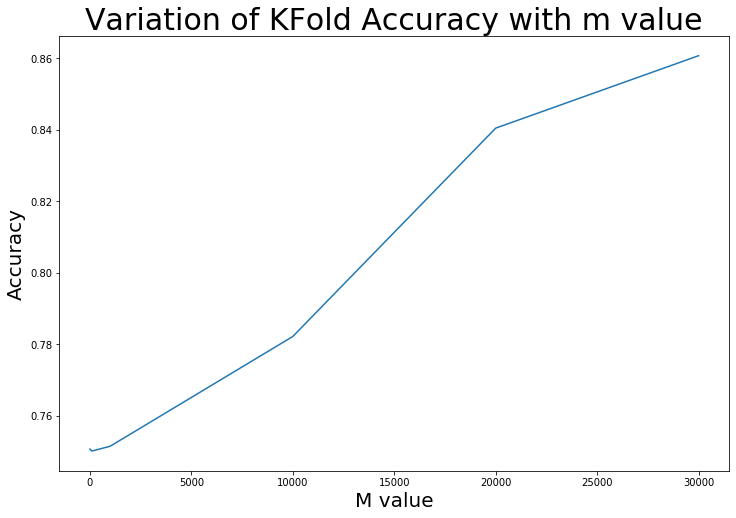

In [ ]:
## plotting variation of KFolf Accuracy with m value
plt.figure(figsize = (12,8))
sns.lineplot(x = [2, 100, 1000, 10000,20000, 30000], y= accuracy_list)
plt.xlabel("M value", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Variation of KFold Accuracy with m value", fontsize = 30)

In [44]:
for i in [2, 100, 1000, 10000,20000, 30000]:
  print(" The Test Accuracy is: ", measure_test_accuracy(X_train, X_test, features_list, feature_type,i))

 The Test Accuracy is:  0.7518301802629163
 The Test Accuracy is:  0.7513053973918291
 The Test Accuracy is:  0.752486158851775
 The Test Accuracy is:  0.7741072131405631
 The Test Accuracy is:  0.819710844638031
 The Test Accuracy is:  0.8555141560179476


################## ASSIGNMENT PART 3 *##################

In [ ]:
##### Feature selection and Outlier Deletion

In [57]:
def delete_outliers(features_list, train):

    """
      This function takes a features_list and the training set.
      It then deletes the outlier points and returns the new training array
    """
    
    new_train = []
    log_dict = {}   ### Keeps note of mean and standard deviations of different features
    temp_df = pd.DataFrame(train)
    for feature in features_list:
        samples = temp_df[feature].values
        log_dict[feature] = (calculate_mean(samples), calculate_stdev(samples))
        
    #return (log_dict)
        
    for sample in train:
        outliers = 0
        for feature in features_list:
            
            if((sample[feature] > log_dict[feature][0] + 3*log_dict[feature][1]) 
               | (sample[feature] < log_dict[feature][0] - 3*log_dict[feature][1])):
                
                outliers +=  1
                
        if outliers < 2:
            new_train.append(sample)
            
    return new_train
             
        

In [58]:
######### ASSIGNMENT SOLUTIONS ####################################################
### 3a) RUN  cell

new_train = delete_outliers(features_list, X_train)

## the new_train contains the training examples after deletion of outliers



In [ ]:
def backward_feature_selection(train, f,feature_type, baseline):

    """
      This function performs backward feature selection based on train and feature list that is passed.
      This fucntion recursively deletes features until no more deletion seems feasible

      returns:
        f (list):
          The selected feature list

    """
    temp_df = pd.DataFrame(train)
    
    baseline = np.mean(baseline) ### This is the baseline accuracy. At the start it is the validation acc
                                ### As we keep deleting features, the accuracy keeps getting modified
    
    f = np.array(f).tolist()
    
    while(1):  ### exits only when deletion process doesnt increase the baseline accuracy
        
        accuracy_diary = {}
        if len(f) == 0:
            return "error"
        
        for feature in f:
            
            print(feature)
            
            acc = []
            data = (temp_df.drop([feature], axis = 1).T.to_dict()).values()
            l = []
            for example in data:
                l.append(example)
            ## l is the list of dictionaries containing the datapoints
            temp_f = [t for t in f if t != feature]
            print(temp_f)
            acc = Kfold_crossvalidation(l, temp_f ,feature_type,2)
            
            accuracy_diary[feature] = np.mean(acc)
            
        max_acc = max(accuracy_diary.values())
        max_key = max(accuracy_diary, key = accuracy_diary.get)
        print(max_acc, max_key)
        print('\n')
        
        if max_acc > baseline:
            baseline = max_acc
            f.remove(max_key)
        elif max_acc <= baseline:
            return f
    

In [ ]:
 ############# ASSIGNMENT SOLUTIONS #####################################
####### 3b) Run cell 

selected_features = backward_feature_selection(X_train, features_list,feature_type, acc)

## Selected features contains the Final set of features selected


Gender
['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Age
['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Driving_License
['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Region_Code
['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Previously_Insured
['Gender', 'Age', 'Driving_License', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Vehicle_Age
['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
Vehicle_Damage
['Gender', 'Age', 'Driving_License', 'Regio

In [ ]:
############# ASSIGNMENT SOLUTIONS #####################################
####### 3b) Run cell : Disclaimer: It takes around 45 minutes to run as it uses 5 Fold CV

selected_features = backward_feature_selection(X_train, features_list,feature_type, acc)

## Selected features contains the Final set of features selected


In [64]:
 ########################### ASSIGNMENT SOLUTIONS ############################
 ## 3c) Run cell

 print("The selected_features are: \n")
 print(selected_features)

 ## Note there are 7 selected features out of 10


The selected_features are: 

['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage']


In [ ]:
 """
selected_features = ['Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Policy_Sales_Channel',
 'Vintage']
"""

In [66]:
######################### ASSIGNMENT SOLUTIONS ########################################
### 3d) run cell
### Prints 5 Fold Cross validation accuracy and test accuracy

acc = Kfold_crossvalidation(new_train, selected_features, feature_type,2)

print("The 5Fold CV accuracy with selected features is : ", np.mean(acc))
print('\n')
print(" The Test Accuracy with selected features is: ", measure_test_accuracy(new_train, X_test, selected_features, feature_type,2))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The 5Fold CV accuracy with selected features is :  0.8771352663342954


 The Test Accuracy with selected features is:  0.8786308414893338


############### ASSIGNMENT PART 2 ###################

In [ ]:
###### Principal Component Analysis

In [45]:
### Here we chose 6 components to retain approximately 95 % variance
## We fit PCA on train, but we dont fit on test, we only transform the test
## using already fit PCA

## Run all cells below

pca = PCA(n_components=6 )
principal_components = pca.fit_transform(df_train.drop("Response", axis = 1).values)

In [46]:
### We are making a PCA feature based training dataframe

principal_df_train = pd.DataFrame(data = principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
principal_df_train = pd.concat([principal_df_train, df_train[['Response']]], axis = 1)

In [47]:
### We are making a PCA feature based testing dataframe
## Note the data is only transformed, not fit

principal_components = pca.transform(df_test.drop("Response", axis = 1).values)
principal_df_test = pd.DataFrame(data = principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
principal_df_test = pd.concat([principal_df_test, df_test[['Response']]], axis = 1)

In [50]:
### Here we are converting the dataframe into a list of dictionaries
## We have to use this form as the Naive Bayes Classifier is built to process data of this form

dic = (principal_df_train).T.to_dict().values()
principal_X_train = []
for example in dic:
    principal_X_train.append(example)

dic = (principal_df_test).T.to_dict().values()
principal_X_test= []
for example in dic:
    principal_X_test.append(example)

In [51]:
#### We are building the feature list and the feature type dictionary as before
## This is essential as it has to be passed into the NB function
## Note: All the features have been considered as discrete

principal_feature_list = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]

principal_feature_type = {}
principal_feature_type["PC1"] = 0
principal_feature_type["PC2"] = 0
principal_feature_type["PC3"] = 0
principal_feature_type["PC4"] = 0
principal_feature_type["PC5"] = 0
principal_feature_type["PC6"] = 0

PCA Visualisation

In [ ]:
########### ASSIGNMENT SOLUTION ###############################
### 2a) Run all the cells below

In [53]:
variances = pca.explained_variance_ratio_ ## The y axis of plots 

Text(0.5, 1.0, ' The % Variance contributed by First 6 PCs')

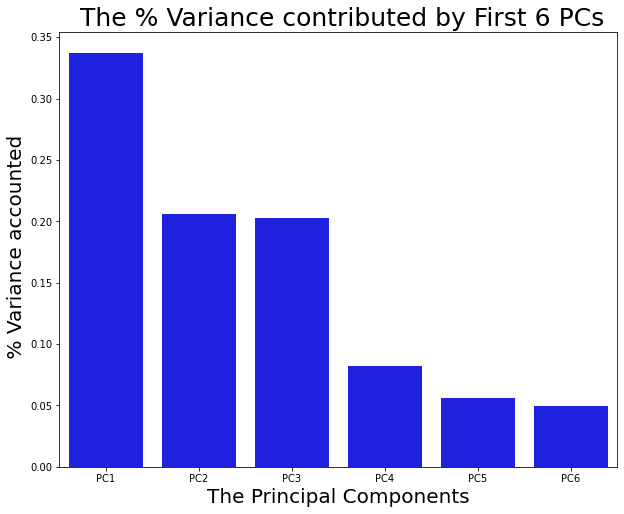

In [54]:
plt.figure(figsize = (10,8))
sns.barplot(x = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"], y = variances, color = 'b')
plt.xlabel("The Principal Components", fontsize = 20)
plt.ylabel(" % Variance accounted",  fontsize = 20)
plt.title(" The % Variance contributed by First 6 PCs", fontsize = 25)

37459
267428


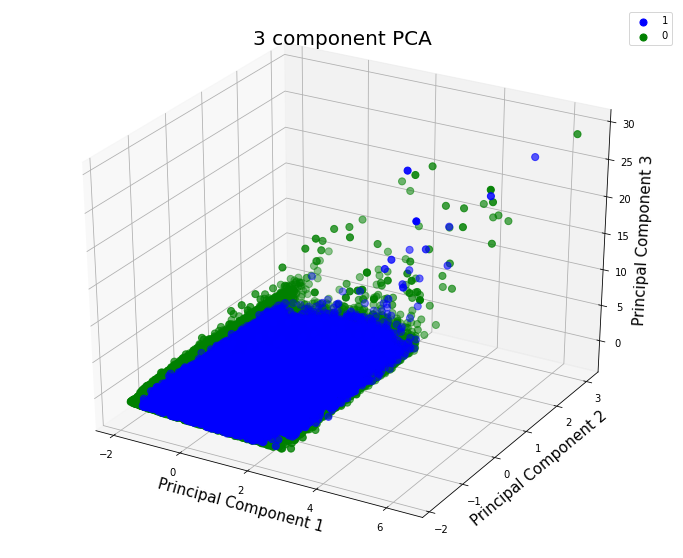

In [55]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = [1,0]
colors = ['b', 'g']
for target, color in zip(targets,colors):
    
    index_keep = principal_df_train['Response'] == target
    print((index_keep).sum())
    
    ax.scatter3D(principal_df_train.loc[index_keep, 'PC1'], principal_df_train.loc[index_keep, 'PC2'], 
                principal_df_train.loc[index_keep, 'PC3'],
              c = color, s= 50)
    
ax.legend(targets)
ax.grid()

9251
66971


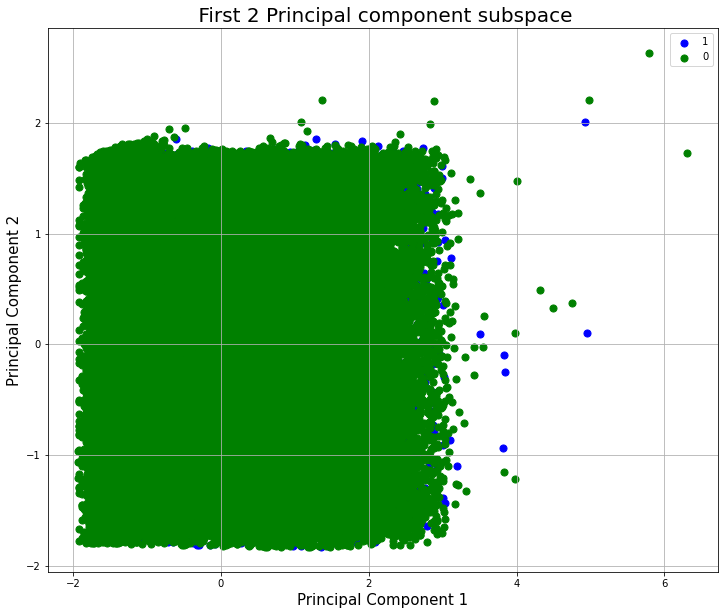

In [56]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' First 2 Principal component subspace', fontsize = 20)

targets = [1,0]
colors = ['b', 'g']
for target, color in zip(targets,colors):
    
    index_keep = principal_df_test['Response'] == target
    print((index_keep).sum())
    
    ax.scatter(principal_df_test.loc[index_keep, 'PC1'], principal_df_test.loc[index_keep, 'PC2'] ,
              c = color, s= 50)
    
ax.legend(targets)
ax.grid()

In [52]:
################# ASSIGNMENT SOLUTIONS ##################################
###### 2b) Run the cell

acc = Kfold_crossvalidation(principal_X_train, principal_feature_list, principal_feature_type, 2)
print("The KFold Accuracy with PCA features: ", np.mean(acc))
print('\n')
print("The Test Accuracy with PCA features: ", measure_test_accuracy(principal_X_train, 
                                                                     principal_X_test, 
                                                                     principal_feature_list,principal_feature_type,2))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The KFold Accuracy with PCA features:  0.8518303494983112


The Test Accuracy with PCA features:  0.8535855789667025
